In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import pandas as pd
import plotly.offline as pyo
import plotly.express as px
pyo.init_notebook_mode()

import dynamics as dyn

**FUNCTIONS**

In [55]:
def fractions_plot(df_fractions_run1):
    dyn.set_layout()
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_figheight(4)
    fig.set_figwidth(18)
    ax[0].set_title('Series')
    sns.lineplot(x= 'Time (us)', y= 'Series (%)', data= df_fractions_run1, hue='Terminus', ax=ax[0])

    
    ax[1].set_title('Parallel')
    sns.lineplot(x= 'Time (us)', y= 'Parallel (%)', data= df_fractions_run1, hue='Terminus', ax=ax[1])
  
    ax[2].set_title('Cross')
    sns.lineplot(x= 'Time (us)', y= 'Cross (%)', data= df_fractions_run1, hue='Terminus', ax=ax[2])
    plt.tight_layout()
    return fig

def save_fig (fig, path, name, savefig=0):
    if savefig:
        if type(fig)== matplotlib.figure.Figure:
            fig.savefig('{}/{}.jpg'.format(path, name))
            fig.savefig('{}/{}.eps'.format(path, name))
        else:
            fig.write_image('{}/{}.jpg'.format(path, name))
            fig.write_image('{}/{}.eps'.format(path, name))
    return 0



def read_CT_data(path_psc, runs, termini,life, termini_lim):
    CT_data=pd.DataFrame()

    for t in range(len(runs)):
        for j in range(len(termini)):
            
            if (runs[t]=='polyQ'):
                CT_fractions=pd.read_csv('{}/{}/{}/{}/pscresults.csv'.format(path_psc, termini[j],runs[t], 
                                  life),  sep= ',', index_col=None)
                CT_fractions.columns = ['index','id','P', 'S','X']
                
            else:
                CT_fractions=pd.read_csv('{}/{}/{}/{}/pscresults.txt'.format(path_psc, termini[j],runs[t], 
                                  life), header=None, sep= ' ')
                CT_fractions.columns = ['id','P', 'S','X']
            CT_fractions['Terminus']=[termini[j]]*len(CT_fractions)
            CT_fractions['Run']=runs[t]
        
            N_contacts= CT_fractions['P']+ CT_fractions['S']+ CT_fractions['X']
            parallel= CT_fractions['P']/N_contacts
            series= CT_fractions['S']/N_contacts 
            cross=  CT_fractions['X']/N_contacts 
            time=np.linspace(0, len(CT_fractions)*0.005, len(CT_fractions))
            N_contacts_norm=N_contacts/(termini_lim[j]*(termini_lim[j]-1))

            new_df={'Parallel (%)': parallel, 'Series (%)': series, 'Cross (%)': cross, 'Time (us)': time,
                'N contacts': N_contacts, 'Run': CT_fractions['Run'], 'Terminus': CT_fractions['Terminus'],
                'N contacts norm':N_contacts_norm}
            new_df=pd.DataFrame(data=new_df)
            frames=[CT_data,new_df]
            CT_data=pd.concat(frames)
    return CT_data

# AR ANALYSIS



LOAD CT DATA

*Choose contact life: short, middle or long*

In [53]:
life='short life'
runs=['run1', 'run2', 'run3']
termini=['NR', 'CR']
path_psc='CT_stats'
savefig=0
N_res=224
C_res=314
termini_lim =[N_res,C_res]
dyn.set_layout()

CT_data = read_CT_data(path_psc, runs, termini,life, termini_lim)

PLOT CT TRACES

<Figure size 432x288 with 0 Axes>

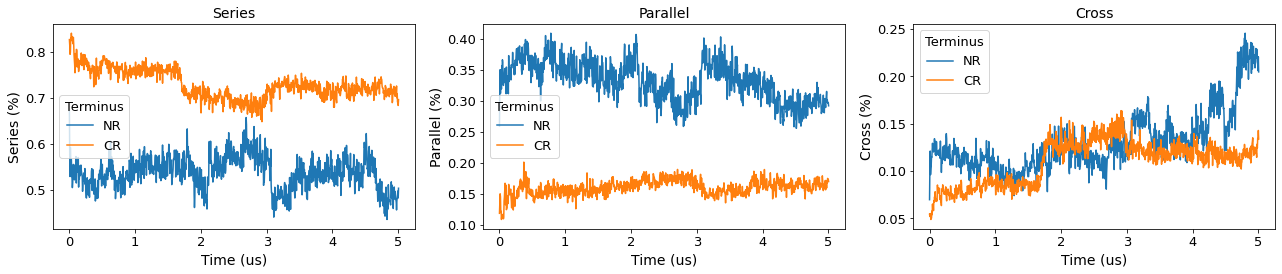

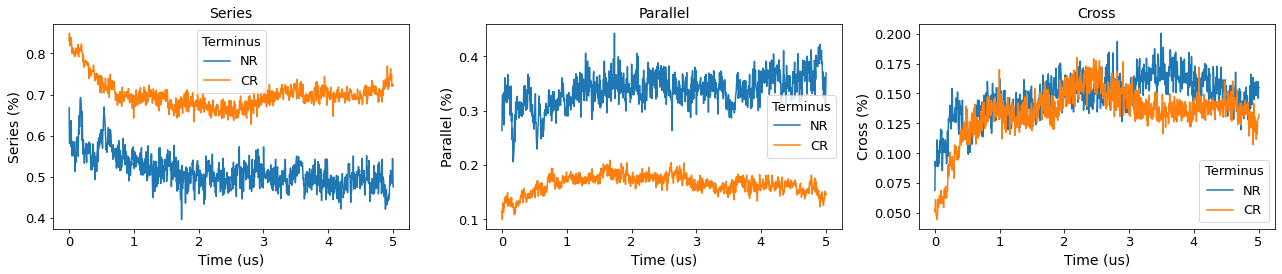

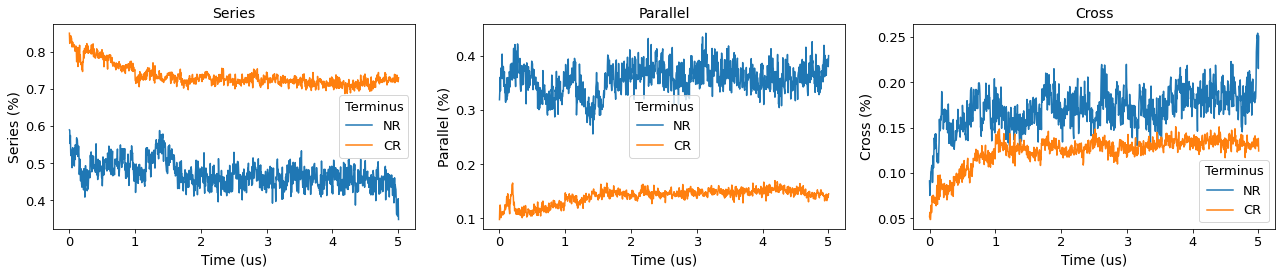

In [54]:
path='results/figures/all protein'
name= 'CT_trace'
plt.figure()
for t in range(len(runs)):
    fig= fractions_plot(CT_data[CT_data['Run']==runs[t]])
    path_run='{}/{}/{}'.format(path, runs[t], life)
    save_fig(fig, path_run, name, savefig)


PLOT CONTACTS AND NORMALIZED CONTACTS BARPLOT

0

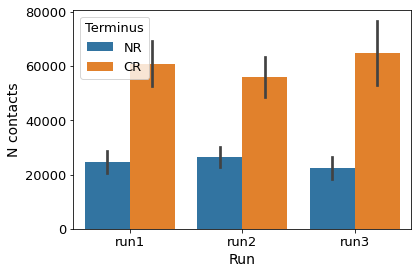

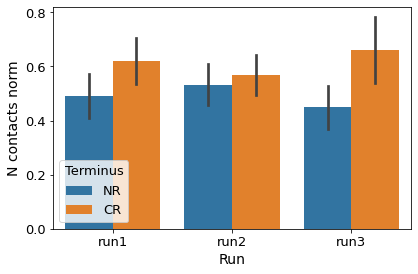

In [28]:
path='results/figures/all protein'

name='barplot_ncontacts'
cont = plt.figure()
ax = sns.barplot(x="Run", y="N contacts", hue='Terminus', data=CT_data, ci='sd')
plt.tight_layout()
save_fig(cont, path, name, savefig)


name='barplot_ncontacts_norm'
cont_norm = plt.figure()
ax = sns.barplot(x="Run", y="N contacts norm", hue='Terminus', data=CT_data, ci='sd')
plt.tight_layout()
save_fig(cont_norm, path, name, savefig)

TRIANGLE PLOT OF THE TWO TERMINI

*Choose the run you want to plot: run1, run2, run3*

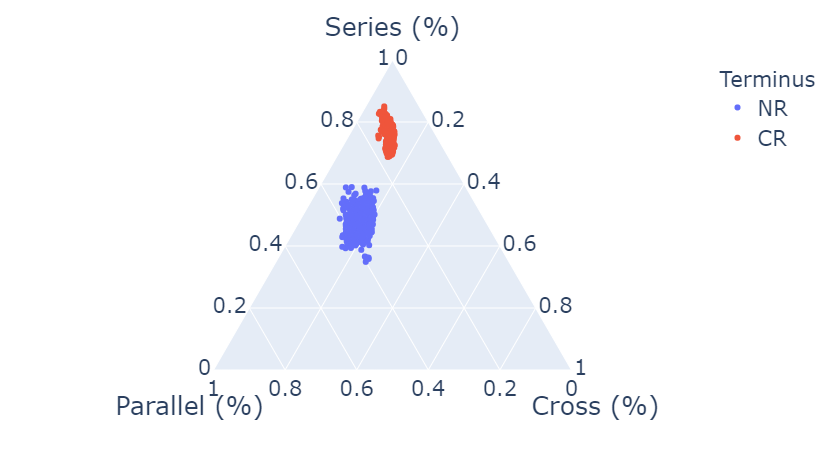

In [33]:
chosen_run= 'run3'
path='results/figures/all protein/{}/{}'.format(chosen_run, life)
name='triangle_{}'.format(life)

fig = px.scatter_ternary(CT_data[CT_data['Run']==chosen_run], a="Series (%)", b="Parallel (%)",
                         c="Cross (%)",  
                         color= "Terminus")

fig.update_layout(font=dict(size=21))
save_fig(fig, path, name, savefig)
fig.show()

TRIANGLE PLOT VS TIME

*Choose run and terminus you want to plot*

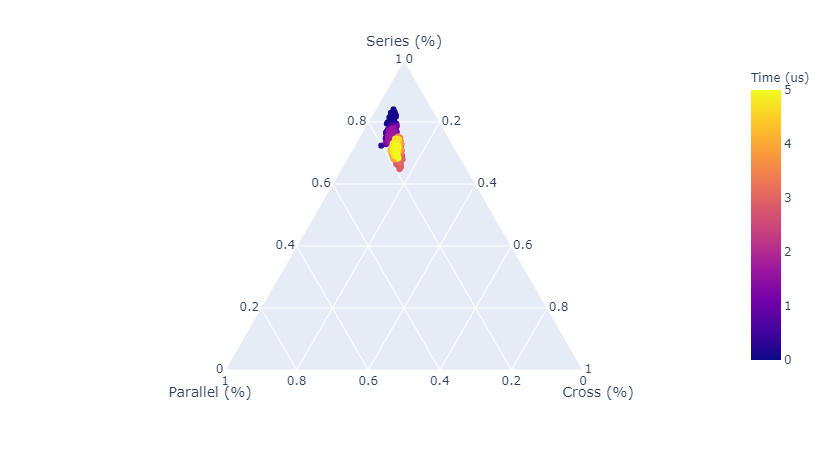

In [30]:
chosen_run='run1'
terminus='CR'
path='results/figures/{}/{}/{}'.format(terminus, chosen_run, life)
name='triangle_{}_{}'.format(chosen_run, terminus)
select_data=CT_data[(CT_data['Run']==chosen_run)&(CT_data['Terminus']==terminus)]

fig= px.scatter_ternary(select_data, a="Series (%)", 
                        b="Parallel (%)", c="Cross (%)", color= "Time (us)")
fig.update_layout(font=dict(size=21))

save_fig(fig, path, name, savefig)
fig.show()

# POLYQ ANALYSIS

In [61]:
life='short life'
runs=['polyQ']
termini=['NR','CR']
path_psc='CT_stats'
savefig=1
N_res=224
C_res=314
termini_lim =[N_res,C_res]
dyn.set_layout()

CT_data = read_CT_data(path_psc, runs, termini,life, termini_lim)

TRIANGLE PLOT

*Choose the terminus you want to plot*

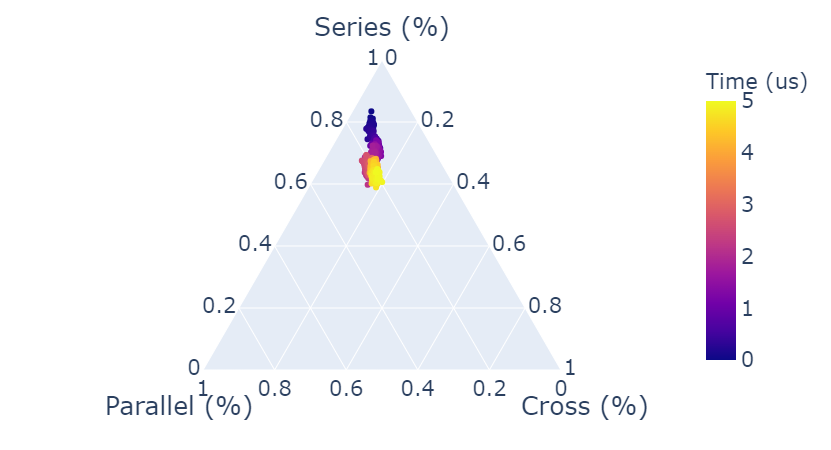

In [63]:
chosen_run='polyQ'
terminus='CR'
path='results/figures/{}/{}/{}'.format(terminus, chosen_run, life)
name='triangle_{}_{}'.format(chosen_run, terminus)


select_data=CT_data[(CT_data['Run']==chosen_run)&(CT_data['Terminus']==terminus)]

fig= px.scatter_ternary(select_data, a="Series (%)", 
                        b="Parallel (%)", c="Cross (%)", color= "Time (us)")
fig.update_layout(font=dict(size=21))

save_fig(fig, path, name, savefig)
fig.show()